In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Challenge Naive Bayes

Dataset: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

### Task
Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [78]:
# Grab and process the raw data.
amazon_raw = pd.read_csv('./datasets/sentiment_labelled_sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_raw.columns = ['sent', 'score']

yelp_raw = pd.read_csv('./datasets/sentiment_labelled_sentences/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['sent', 'score']

imdb_raw = pd.read_csv('./datasets/sentiment_labelled_sentences/imdb_labelled.txt', delimiter= '\t', header=None)
imdb_raw.columns = ['sent', 'score']


### the Amazon dataset

In [79]:
# find any keywords which are typically for each category 
keywords = ['Great', 
            'Excellent', 
            'excellent', 
            'good', 
            'Good', 
            'great', 
            'wast', 
            'Not Buy', 
            'poor', 
            'not work', 
            'disapoinment', 
            'glad', 
            'love',
            'recommend',
            'perfect',
            'Unreliable',
            'unreliable',
            'happy',
            'unhappy',
            'best',
            'excelent',
            'Excelent',
            'nice',
            'fine']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sent.str.contains(
        str(key),
        case=False
    )

In [80]:
# no correlation
# amazon_raw['allcaps'] = amazon_raw.sent.str.isupper() 

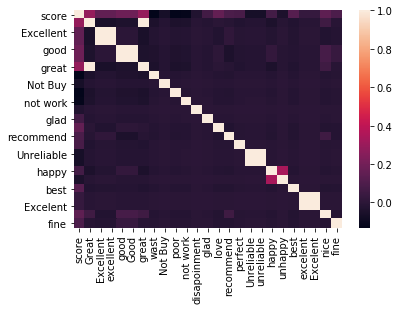

In [81]:
sns.heatmap(amazon_raw.corr())

In [82]:
data = amazon_raw[keywords]
target = amazon_raw['score']

In [83]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 257


### the Yelp dataset 

In [84]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.sent.str.contains(
        str(key),
        case=False
    )
data = yelp_raw[keywords]
target = yelp_raw['score']

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 311


### the imdb dataset

In [85]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_raw[str(key)] = imdb_raw.sent.str.contains(
        str(key),
        case=False
    )
data = imdb_raw[keywords]
target = imdb_raw['score']

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 299


#### Result: the features (keywords) are not generlizing to the other datasets. The perfomance went down. 